In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [4]:
# Load the data
file_path = 'medical_time_series.csv'
medical_timeseries = pd.read_csv(file_path)  # Assuming it's a CSV file

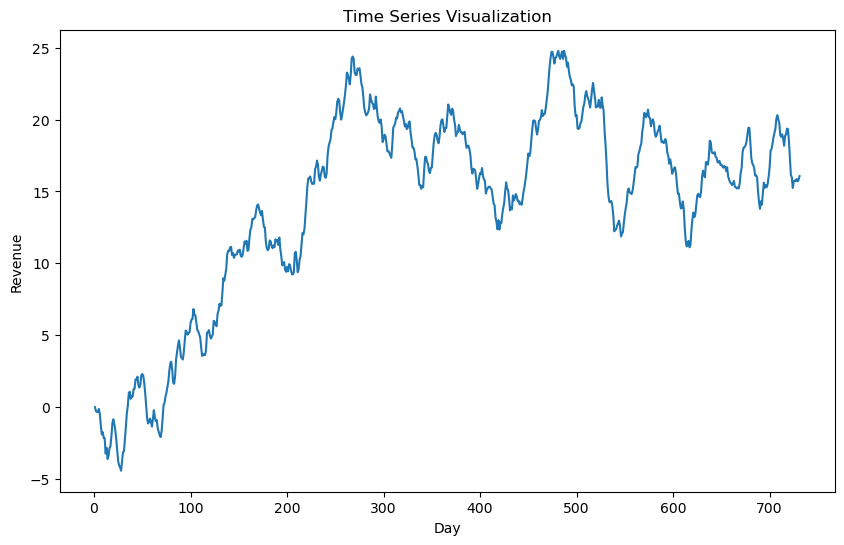

In [5]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(medical_timeseries['Day'], medical_timeseries['Revenue'])
plt.title('Time Series Visualization')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

In [6]:
medical_timeseries['Revenue'] = medical_timeseries['Revenue'].diff().dropna()

In [7]:
print(medical_timeseries)

     Day   Revenue
0      1       NaN
1      2 -0.292356
2      3 -0.035416
3      4 -0.012215
4      5  0.215100
..   ...       ...
726  727 -0.032693
727  728  0.143766
728  729 -0.156834
729  730  0.113880
730  731  0.246562

[731 rows x 2 columns]


In [8]:
medical_timeseries.dropna(subset=['Revenue'], inplace=True)

In [9]:
print(medical_timeseries)

     Day   Revenue
1      2 -0.292356
2      3 -0.035416
3      4 -0.012215
4      5  0.215100
5      6 -0.366702
..   ...       ...
726  727 -0.032693
727  728  0.143766
728  729 -0.156834
729  730  0.113880
730  731  0.246562

[730 rows x 2 columns]


In [10]:
result = adfuller(medical_timeseries['Revenue'])

ADF Statistic: -17.374772303557062
p-value: 5.113206978840171e-30
Critical Values:
   1%: -3.4393520240470554
   5%: -2.8655128165959236
   10%: -2.5688855736949163


C:\Users\jdegraft\AppData\Local\anaconda3\envs\rstudio\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jdegraft\AppData\Local\anaconda3\envs\rstudio\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jdegraft\AppData\Local\anaconda3\envs\rstudio\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jdegraft\AppData\Local\anaconda3\envs\rstudio\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


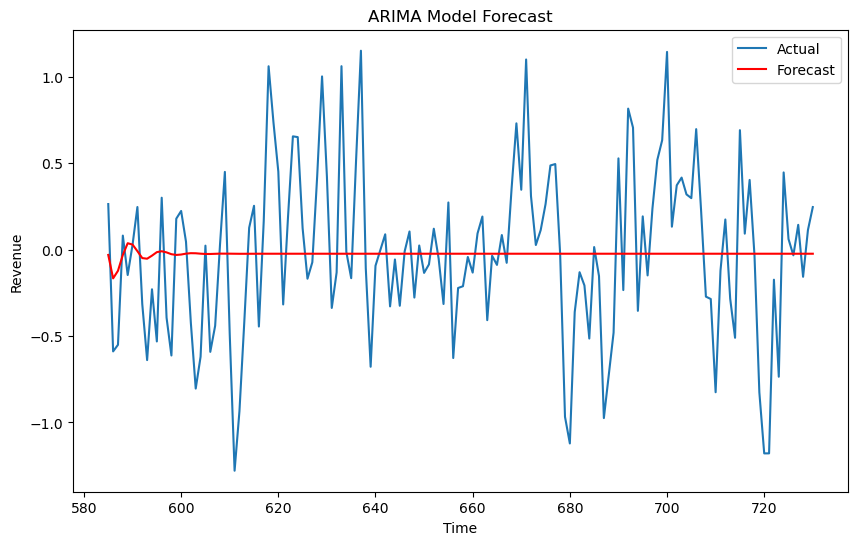

In [11]:
# Perform Augmented Dickey-Fuller test
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Split the data into training and test sets
train_size = int(len(medical_timeseries) * 0.8)
train_set = medical_timeseries['Revenue'].iloc[:train_size]
test_set = medical_timeseries['Revenue'].iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_set, order=(5, 1, 0))  # Example order, you may need to tune this
fit_model = model.fit()

# Forecast
forecast_result = fit_model.forecast(steps=len(test_set))

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test_set.index, test_set, label='Actual')
plt.plot(test_set.index, forecast_result, color='red', label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()

print(fit_model)

In [12]:
# First, install the pmdarima package if needed by uncommenting the following line:


Could not fetch URL https://pypi.org/simple/pmdarima/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pmdarima/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1051)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1051)'))) - skipping


ERROR: Could not find a version that satisfies the requirement pmdarima (from versions: none)
ERROR: No matching distribution found for pmdarima


In [14]:


# Import the auto_arima function
import auto_arima

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Run auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(data['Revenue'], start_p=1, start_q=1,
                              test='adf',       # use adftest to find optimal 'd'
                              max_p=3, max_q=3, # maximum p and q
                              m=1,              # frequency of series
                              d=None,           # let model determine 'd'
                              seasonal=False,   # No Seasonality
                              start_P=0, 
                              D=0, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

print(auto_arima_model.summary())

# Fit the best ARIMA model
model = ARIMA(data['Revenue'], order=auto_arima_model.order)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.get_forecast(steps=10)
forecast_index = pd.RangeIndex(start=data.index[-1] + 1, stop=data.index[-1] + 11, step=1)
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Revenue'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.title('ARIMA Model Forecast')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'auto_arima'